In [60]:
from nba_api.stats.endpoints import leaguegamelog
from nba_api.stats.static import teams 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from termcolor import colored

In [41]:
teams_info = teams.get_teams()

In [42]:
abbreviations = [x['abbreviation'] for x in teams_info]
print(abbreviations)

['ATL', 'BOS', 'CLE', 'NOP', 'CHI', 'DAL', 'DEN', 'GSW', 'HOU', 'LAC', 'LAL', 'MIA', 'MIL', 'MIN', 'BKN', 'NYK', 'ORL', 'IND', 'PHI', 'PHX', 'POR', 'SAC', 'SAS', 'OKC', 'TOR', 'UTA', 'MEM', 'WAS', 'DET', 'CHA']


In [43]:
league_game_log = leaguegamelog.LeagueGameLog(season = '2021', player_or_team_abbreviation = 'T').get_data_frames()[0]
league_game_log.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22021,1610612747,LAL,Los Angeles Lakers,0022100002,2021-10-19,LAL vs. GSW,L,240,45,...,40,45,21,7,4,18,25,114,-7,1
1,22021,1610612744,GSW,Golden State Warriors,0022100002,2021-10-19,GSW @ LAL,W,240,41,...,41,50,30,9,2,17,18,121,7,1
2,22021,1610612749,MIL,Milwaukee Bucks,0022100001,2021-10-19,MIL vs. BKN,W,240,48,...,41,54,25,8,9,8,19,127,23,1
3,22021,1610612751,BKN,Brooklyn Nets,0022100001,2021-10-19,BKN @ MIL,L,240,37,...,39,44,19,3,9,13,17,104,-23,1
4,22021,1610612766,CHA,Charlotte Hornets,0022100003,2021-10-20,CHA vs. IND,W,240,46,...,34,46,29,9,5,8,21,123,1,1


In [44]:
columns = list(league_game_log.columns)[8:-1]
print(columns)

['MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PLUS_MINUS']


In [45]:
stat = input("Type the stat you want to visualize: ").upper()
while stat not in columns:
    print("Invalid stat.")
    stat = input("Type the stat you want to visualize: ")
    
n_last_games = 15

Type the stat you want to visualize: PTS


In [46]:
def get_team_games(team, games):
    games_dict = dict()
    games_dict['GAMES'] = games[games['TEAM_ABBREVIATION'] == team]
    games_dict['GAMES_OPP'] = games[(games['MATCHUP'].str.contains(team)) & (games['TEAM_ABBREVIATION'] != team)]
    games_dict['GAMES_HOME'] = games_dict['GAMES'][~games_dict['GAMES']['MATCHUP'].str.contains('@')]
    games_dict['GAMES_HOME_OPP'] = games_dict['GAMES_OPP'][games_dict['GAMES_OPP']['MATCHUP'].str.contains('@')]
    games_dict['GAMES_AWAY'] = games_dict['GAMES'][games_dict['GAMES']['MATCHUP'].str.contains('@')]
    games_dict['GAMES_AWAY_OPP'] = games_dict['GAMES_OPP'][~games_dict['GAMES_OPP']['MATCHUP'].str.contains('@')]
    return games_dict
    
def get_team_stat_means(team, games, stat, n_last_games):
    games = get_team_games(team, games)
    return team, games['GAMES'].iloc[-n_last_games:,:][stat].mean(), games['GAMES_OPP'].iloc[-n_last_games:,:][stat].mean(), games['GAMES_HOME'].iloc[-n_last_games:,:][stat].mean(), games['GAMES_HOME_OPP'].iloc[-n_last_games:,:][stat].mean(), games['GAMES_AWAY'].iloc[-n_last_games:,:][stat].mean(), games['GAMES_AWAY_OPP'].iloc[-n_last_games:,:][stat].mean()
    
rows = []
for team in abbreviations:
    rows.append(get_team_stat_means(team, league_game_log, stat, n_last_games))
    
teams_stats = pd.DataFrame(rows, columns=['TEAM', 'MADE', 'CONCEDED', 'HOME_MADE', 'HOME_CONCEDED', 'AWAY_MADE', 'AWAY_CONCEDED'])
teams_stats

,TEAM,MADE,CONCEDED,HOME_MADE,HOME_CONCEDED,AWAY_MADE,AWAY_CONCEDED
0,ATL,113.466667,112.933333,113.866667,115.066667,113.066667,112.266667
1,BOS,108.200000,97.800000,108.000000,99.266667,109.533333,108.133333
2,CLE,104.200000,102.066667,110.733333,99.266667,106.133333,105.333333
3,NOP,106.133333,107.000000,111.133333,110.066667,105.400000,108.266667
4,CHI,113.533333,115.133333,119.400000,112.600000,108.666667,114.666667
5,DAL,109.600000,104.333333,108.000000,99.466667,107.533333,104.133333
6,DEN,115.600000,110.066667,113.866667,114.133333,109.866667,105.533333
7,GSW,112.933333,105.866667,110.733333,99.933333,107.866667,108.266667
8,HOU,111.266667,121.333333,111.200000,120.666667,111.866667,120.666667
9,LAC,109.200000,109.933333,106.333333,111.400000,106.666667,107.600000


In [235]:
def plot_stats_chart(team, games, opp_games, stat, teams_stats):
    dates = np.array(games['GAME_DATE'])
    made = np.array(games[stat])
    conceded = np.array(opp_games[stat])
    plt.plot(dates, made, c='blue', label ='Made')
    plt.plot(dates, conceded, c='red', label ='Conceded')
    
    for i in range(len(dates)):
        host = 'A' if '@' in games.iloc[i,:]['MATCHUP'] else 'H'
        plt.annotate("{}:{}".format(i+1, host), (dates[i], made[i] + 1), fontsize=8)
        
    title = "{} - {} Made-Conceded Progression".format(team, stat)
    
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(stat)
    
    for xc in dates:
        plt.axvline(x=xc, color='black', linewidth=0.5)
        
    plt.xticks(fontsize=10, rotation=90)
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.savefig(title + '.jpg', dpi=100)
    
    plt.show()

In [233]:
def plot_totals_with_line(team, games, opp_games, line, stat):
    dates = np.array(games['GAME_DATE'])
    made = np.array(games[stat])
    conceded = np.array(opp_games[stat])
    totals = made + conceded
    plt.plot(dates, totals, c='blue', label ='Totals')
    for i in range(len(dates)):
        host = 'A' if '@' in games.iloc[i,:]['MATCHUP'] else 'H'
        plt.annotate("{}:{}".format(i+1, host), (dates[i], totals[i] + 1), fontsize=8)
    
    title = "{} - {} Totals Progression".format(team, stat)
    
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('{} Totals'.format(stat))
    
    plt.axhline(y=line, color='r', linestyle='-')
    for xc in dates:
        plt.axvline(x=xc, color='black', linewidth=0.5)
        
    plt.xticks(fontsize=10, rotation=90)
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.savefig(title + '.jpg', dpi=100)
    
    plt.show()

In [238]:
def get_team_made_conceded_pct(games, opp_games, stat, line):
    made = np.array(games[stat])
    conceded = np.array(opp_games[stat])
    totals = made + conceded
    greater = (totals > line).sum()
    pct = greater*100/len(totals)
    return pct

def get_team_info(team, games, line, stat, n_last_games, is_home):
    overall_pct = get_team_made_conceded_pct(games['GAMES'].iloc[-n_last_games:,:], games['GAMES_OPP'].iloc[-n_last_games:,:], stat, line)
    print("\n{} had their totals above {} in {:.2f}% of the last {} games".format(team, line, overall_pct, n_last_games))
    if is_home:
        home_pct = get_team_made_conceded_pct(games['GAMES_HOME'], games['GAMES_HOME_OPP'], stat, line)
        print("At home, {} had their totals above {} in {:.2f}% of the last {} games".format(team, line, overall_pct, n_last_games))
    else:
        awat_pct = get_team_made_conceded_pct(games['GAMES_AWAY'], games['GAMES_AWAY_OPP'], stat, line)
        print("On the road, {} had their totals above {} in {:.2f}% of the last {} games".format(team, line, awat_pct, n_last_games))
        
def display_team_info(team, games, line, stat, n_last_games, is_home, teams_stats):
    games = get_team_games(team, games)
    last_games = games['GAMES'].iloc[-n_last_games:,:].reset_index(drop=True)
    last_games_opp = games['GAMES_OPP'].iloc[-n_last_games:,:]
    print('LAST {} GAMES:'.format(n_last_games))
    for i, row in last_games.iterrows():
        game_string = "{}: {} {} {} {} {} // Diff: {}".format(i+1, team, row['PTS'], '@' if '@' in row['MATCHUP'] else 'X', last_games_opp.iloc[i,:]['PTS'], last_games_opp.iloc[i,:]['TEAM_ABBREVIATION'], row['PTS']-last_games_opp.iloc[i,:]['PTS'])
        if row['WL'] == 'W':
            print(colored(game_string, 'green'))
        else:
            print(colored(game_string, 'red'))
    
    get_team_info(team, games, line, stat, n_last_games, is_home)
    plot_stats_chart(team, games['GAMES'].iloc[-n_last_games:,:], games['GAMES_OPP'].iloc[-n_last_games:,:], stat, teams_stats)
    plot_totals_with_line(team, games['GAMES'].iloc[-n_last_games:,:], games['GAMES_OPP'].iloc[-n_last_games:,:], line, stat)


In [224]:
team_a = input("Type the abbreviation of the home team: ")
while team_a not in abbreviations:
    print("Invalid team.")
    team_a = input("Type the abbreviation of the home team: ")
    
team_b = input("Type the abbreviation of the away team: ")
while team_b not in abbreviations:
    print("Invalid team.")
    team_b = input("Type the abbreviation of the away team: ")

Type the abbreviation of the home team: LAC
Type the abbreviation of the away team: MIL


In [225]:
while True:
    line = input("Type the line that represents the spread: ")
    try:
        line = float(line)
        break
    except ValueError:
        pass
    print("Invalid value.")

Type the line that represents the spread: 227


LAST 15 GAMES:
1: LAC 108 X 123 MEM // Diff: -15
2: LAC 106 X 93 ATL // Diff: 13
3: LAC 87 X 85 DEN // Diff: 2
4: LAC 89 @ 113 NOP // Diff: -24
5: LAC 94 @ 101 SAS // Diff: -7
6: LAC 139 X 133 IND // Diff: 6
7: LAC 128 @ 130 DEN // Diff: -2
8: LAC 102 @ 101 PHI // Diff: 1
9: LAC 102 @ 110 NYK // Diff: -8
10: LAC 116 @ 115 WAS // Diff: 1
11: LAC 111 @ 102 ORL // Diff: 9
12: LAC 114 @ 121 MIA // Diff: -7
13: LAC 115 @ 90 CHA // Diff: 25
14: LAC 116 @ 122 IND // Diff: -6
15: LAC 111 X 110 LAL // Diff: 1

LAC had their totals above 227.0 in 40.00% of the last 15 games
At home, LAC had their totals above 227.0 in 40.00% of the last 15 games


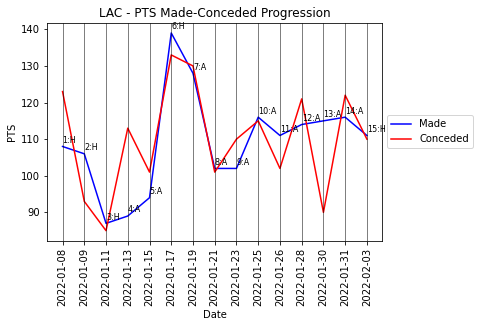

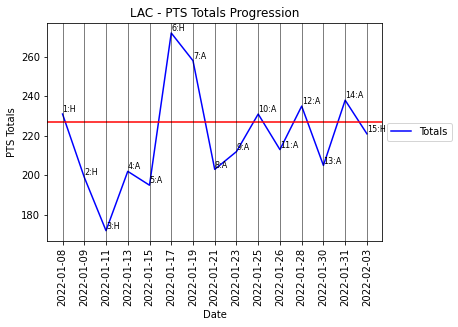

In [239]:
display_team_info(team_a, league_game_log, line, stat, n_last_games, True, teams_stats)

LAST 15 GAMES:
1: MIL 111 X 117 TOR
2: MIL 121 @ 109 BKN
3: MIL 106 @ 114 CHA
4: MIL 99 @ 103 CHA
5: MIL 118 X 99 GSW
6: MIL 96 X 103 TOR
7: MIL 114 @ 121 ATL
8: MIL 126 X 114 MEM
9: MIL 94 X 90 CHI
10: MIL 133 X 127 SAC
11: MIL 99 @ 115 CLE
12: MIL 123 X 108 NYK
13: MIL 100 X 136 DEN
14: MIL 112 X 98 WAS
15: MIL 137 @ 108 POR

MIL had their totals above 227.0 in 53.33% of the last 15 games
On the road, MIL had their totals above 227.0 in 46.15% of the last 15 games


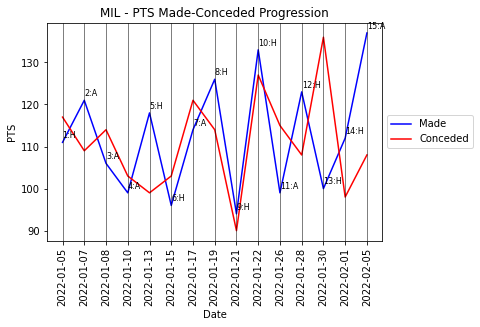

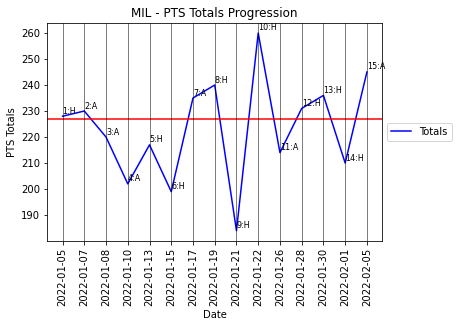

In [237]:
display_team_info(team_b, league_game_log, line, stat, n_last_games, False, teams_stats)